In [1]:
from plots import PlotConfusionMatrixSchema, PlotPpvNpv, HexbinPlotsForComparisonCategoryAndFlexibilityCategory
import pandas as pd
import numpy as np
from helpers import GetMetrics

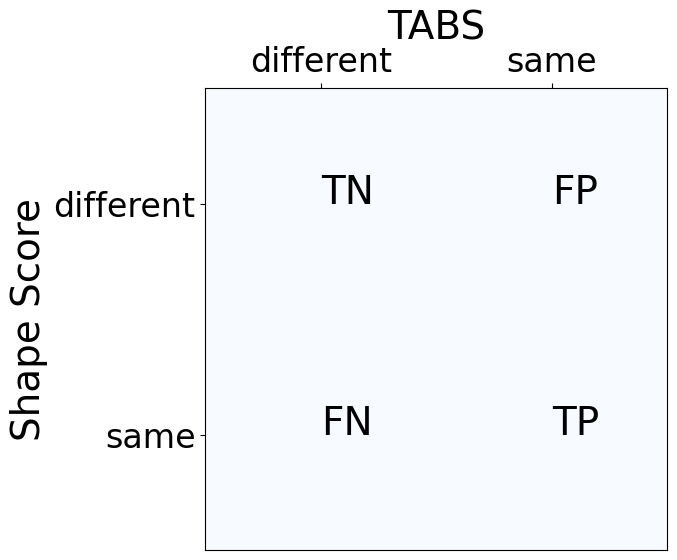

In [2]:
PlotConfusionMatrixSchema('shape');

In [3]:
data = pd.read_csv("../Data/TABS/Output/ba0fe6e5-bc86-46a6-9ea0-a461f8359cc4_metrics.txt")
data.head()
data2 = pd.read_csv("../Data/TABS/Output/8ae5bfbb-6051-4cea-a8aa-ddc31baadded_metrics.txt")
# Combine the two datasets
data = pd.concat([data, data2], ignore_index=True)
data

,cid1,cid2,tabsAgreement,rmsd,shapeTanimoto,shapeColor
0,1,0,0,0.554613,0.894678,0.532477
1,2,0,0,0.768086,0.879279,0.490647
2,2,1,0,1.016738,0.760008,0.287562
3,3,0,0,1.012963,0.795679,0.173775
4,3,1,0,1.148160,0.724053,0.126144
...,...,...,...,...,...,...
9895,99,94,0,3.524236,0.440762,0.012169
9896,99,95,0,3.764170,0.446811,0.124654
9897,99,96,0,2.743001,0.690739,0.075055
9898,99,97,0,1.841011,0.532406,0.058466


In [4]:
cutoffsShape = np.arange(0.3,1.0,0.02)
cutoffsShape

array([0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44, 0.46, 0.48, 0.5 ,
       0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66, 0.68, 0.7 , 0.72,
       0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88, 0.9 , 0.92, 0.94,
       0.96, 0.98])

In [5]:
res = [GetMetrics(data['shapeTanimoto'], data['tabsAgreement'], comparisonid=4, comparisonMeasureCutoffTrue=c, comparisonMeasureCutoffPred=-1) for c in cutoffsShape]

In [6]:
cutoffs = np.round(cutoffsShape, 2)
npvs = [r['npv'] for r in res]
ppvs = [r['ppv'] for r in res]

This example only showcases the PPV/NPV calculation for 2 examples of the medium category. Hence, no conclusions about the general threshold should be made from the plot below.

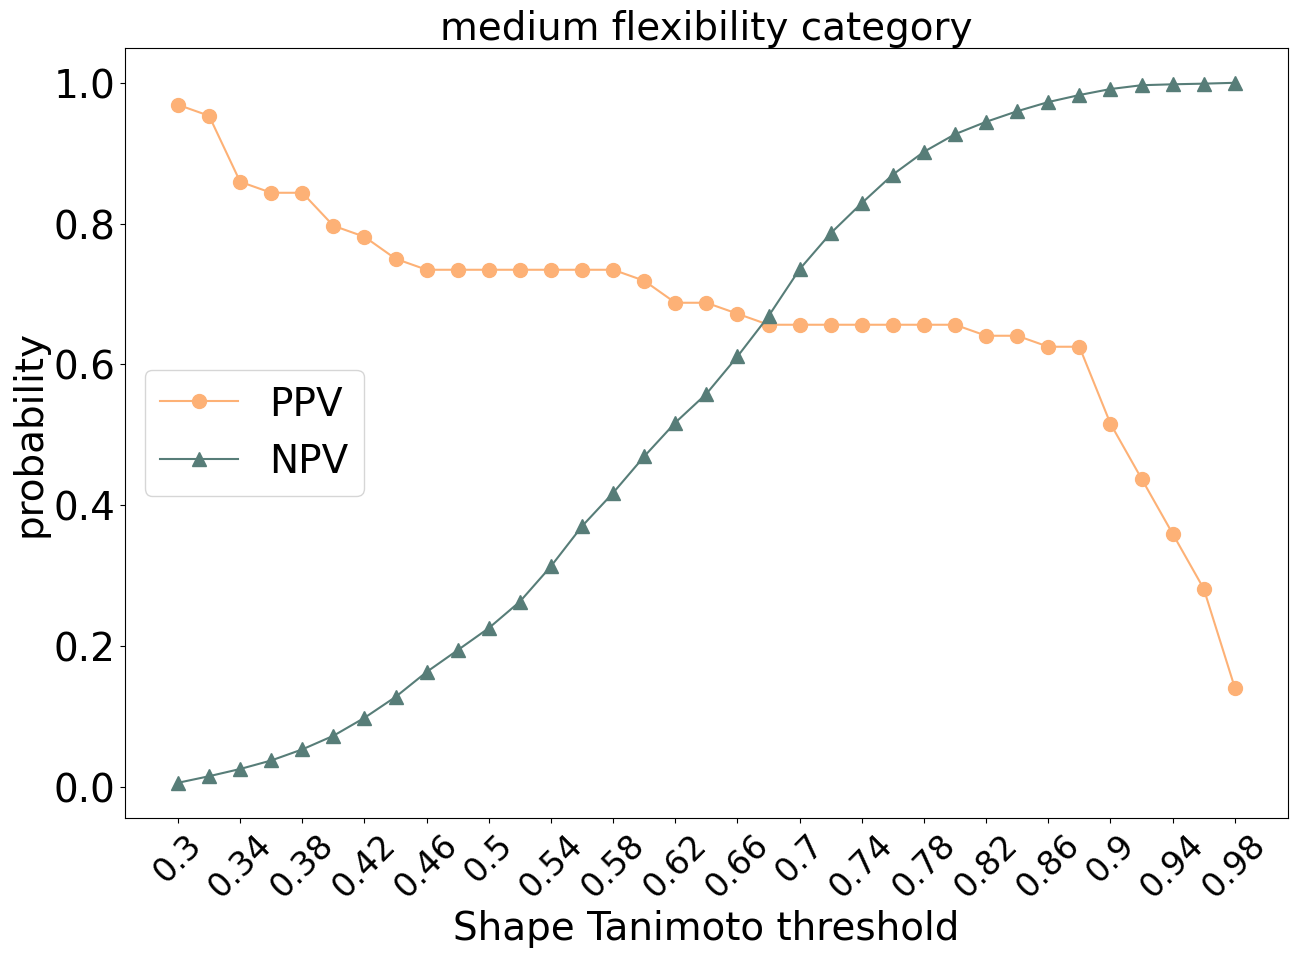

In [7]:
ig = PlotPpvNpv("Shape Tanimoto threshold",cutoffs, npvs, ppvs, "medium flexibility category",None);

SI Figures: Shape Tanimoto and RMSD comparison

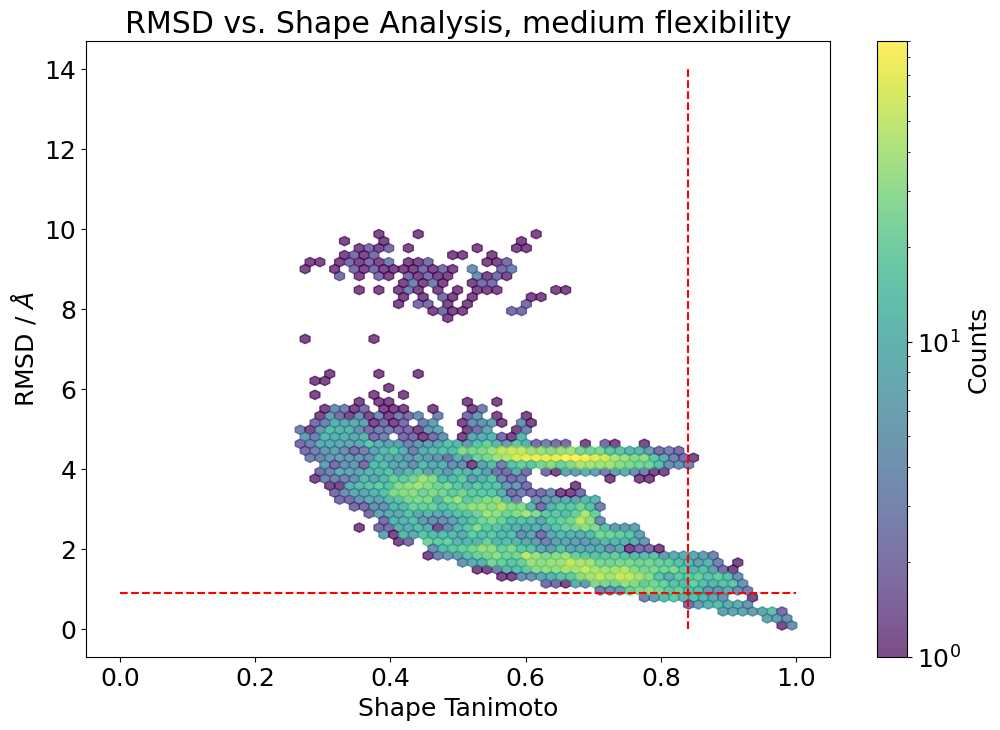

In [13]:
HexbinPlotsForComparisonCategoryAndFlexibilityCategory("RMSD vs. Shape Analysis, medium flexibility", 'Shape Tanimoto', data['shapeTanimoto'], r'RMSD / $\AA$', data['rmsd'], xThreshold=0.84, yThreshold=0.9);